# Experiment 4 - Schedule Choice Importance

Generates good lookin graphs from metrics output files

In [1]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%run '/home/mark/Desktop/Project/Metrics-Analysis/Utilities.ipynb'

Program parameters:

In [2]:
folder_path1     = '../../Testing/Plastic-Parallel-Programming/build/runs/Experiment 4/run1'
folder_path2     = '../../Testing/Plastic-Parallel-Programming/build/runs/Experiment 4/run2'
rootword         = 'Experiment'
numOfExperiments = 3
numOfRepeats     = 50

Set files to read

In [3]:
file_names = []

for i in range(numOfExperiments):
    repeat_file_names = []
    
    for j in range(numOfRepeats):
        repeat_file_names.append(rootword + str(i + 1) + "_Repeat" + str(j) + ".csv")
        
    file_names.append(repeat_file_names)

Import the dataset

In [4]:
data1 = []
data2 = []
        
fetch_data(folder_path1, file_names, data1)
fetch_data(folder_path2, [file_names[0]], data2)
        
data1 = extract_runtimes(data1)
data2 = extract_runtimes(data2)

gen_data1 = generate_data2(['Static', 'Dynamic Chunks', 'Dynamic Individual'], False, data1)
gen_data2 = generate_data2(['Static, then \nDynamic Chunks'], False, data2)

dataset = pd.DataFrame(gen_data1 + gen_data2,
                       columns=['Schedule', 'Plasticity', 'Runtime (Milliseconds)'])

Create the graph

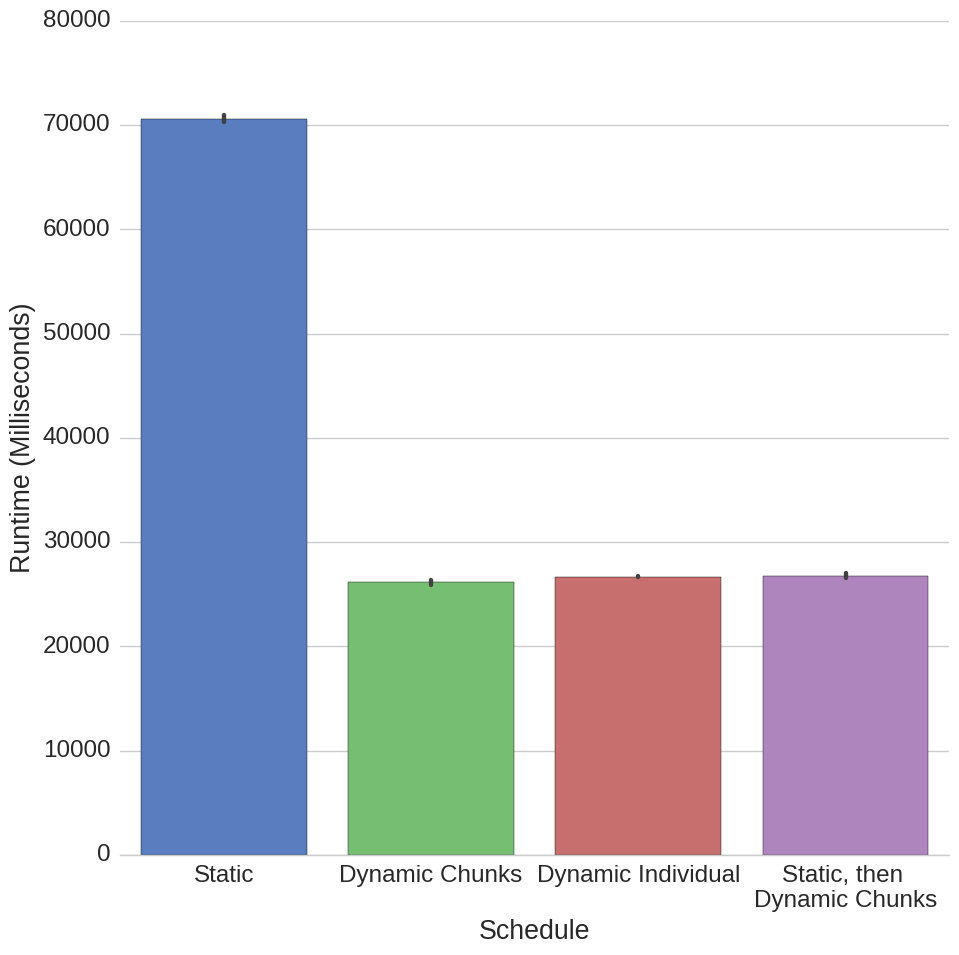

In [5]:
sns.set(style="whitegrid", font_scale=1.75)

graph = sns.factorplot(x="Schedule", y = "Runtime (Milliseconds)", data=dataset, 
                   size=10, kind="bar", palette="muted")

graph.despine(left=True)
graph.savefig("Graphs/experiment4.png")

sns.plt.show()